In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

import warnings
warnings.filterwarnings('ignore')

In [53]:
data=pd.read_csv(r'spam.csv',encoding='latin1')

# Explore Data

In [54]:
#data.head()
#data.tail()
data.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5413,ham,Nite nite pocay wocay luv u more than n e thin...,NaN,NaN,NaN
4257,ham,I am late. I will be there at,NaN,NaN,NaN
2440,ham,"Great. I'm in church now, will holla when i ge...",NaN,NaN,NaN
173,ham,"Bloody hell, cant believe you forgot my surnam...",NaN,NaN,NaN
654,ham,Did u got that persons story,NaN,NaN,NaN
1147,ham,Ok... Help me ask if she's working tmr a not?,NaN,NaN,NaN
2171,ham,I wont. So wat's wit the guys,NaN,NaN,NaN
2519,ham,Ok. I only ask abt e movie. U wan ktv oso?,NaN,NaN,NaN
5065,ham,I calls you later. Afternoon onwords mtnl serv...,NaN,NaN,NaN
2699,ham,Oh baby of the house. How come you dont have a...,NaN,NaN,NaN


In [55]:
data.shape

(5572, 5)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [57]:
data.duplicated().sum()

403

In [58]:
data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

# Cleaning Data

In [59]:
data=data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [60]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [61]:
data=data.rename(columns={'v1':'Target','v2':'Text'})

In [62]:
data

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [63]:
data=data.drop_duplicates(keep='first')

In [64]:
data.duplicated().sum()

0

In [65]:
data.isnull().sum()

Target    0
Text      0
dtype: int64

In [66]:
data['Target'].replace({'ham':0,'spam':1},inplace=True)

In [67]:
data

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# Data Analysis

<Axes: ylabel='count'>

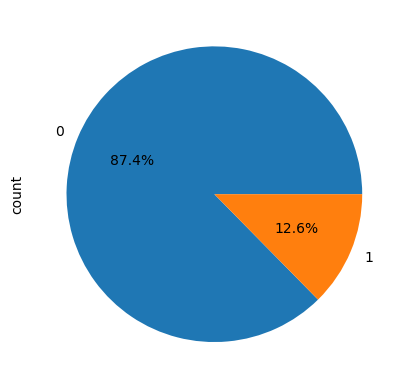

In [68]:
data.Target.value_counts().plot.pie(autopct='%.1f%%')

In [69]:
data['Num_Char']=data['Text'].apply(len)

In [70]:
data

,Target,Text,Num_Char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [71]:
data['Word_Num']=data['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [72]:
data

,Target,Text,Num_Char,Word_Num
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [73]:
data['Sent_num']=data['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [74]:
data

,Target,Text,Num_Char,Word_Num,Sent_num
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


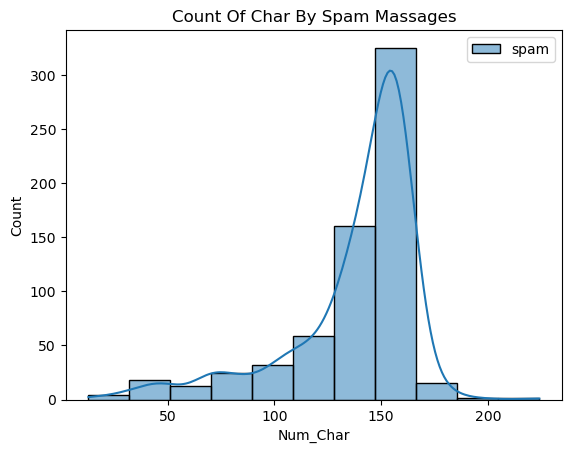

In [75]:
sns.histplot(data[data['Target']==1]['Num_Char'],binwidth=20,kde=True,label='spam')
plt.legend()
plt.title('Count Of Char By Spam Massages')
plt.show()

In [76]:
df=data[['Target','Num_Char','Word_Num','Sent_num']]

In [77]:
cor=df.corr()

<Axes: >

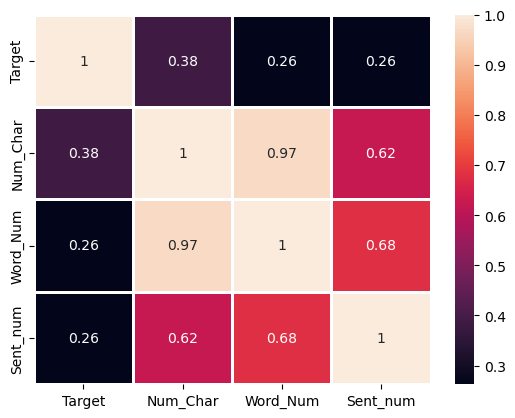

In [78]:
sns.heatmap(cor,annot=True,linewidth=1)

# Data Processing

* Lower Case
* Tokenization
* remove Special Case
* Remove Stop Words
* Stemming

In [79]:
import string
punc=string.punctuation
from nltk.corpus import stopwords
stop=stopwords.words("English")
from nltk.stem import WordNetLemmatizer
wnl=WordNetLemmatizer()

In [80]:
#nltk.download("wordnet")

In [81]:
def Process(text):
    text=text.lower()
    token=nltk.word_tokenize(text)
    process_tokens=[]
    for word in token:
       if word not in punc and word not in stop:
            process_tokens.append(word)
    stemmed_tokens=[]
    for word in process_tokens:
        stemmed_tokens.append(wnl.lemmatize(word,pos="v"))
        
    return " ".join(stemmed_tokens)
    



In [82]:
y = "Ahmed Omar has Played with me in the playground."

In [83]:
Process(y)

'ahmed omar play playground'

In [84]:

data['New_Text']=data['Text'].apply(Process)

In [85]:
data

,Target,Text,Num_Char,Word_Num,Sent_num,New_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy .. available bugis n gre...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor ... u c already say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think go usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time try 2 contact u. u å£750 pound prize ...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,ì_ b go esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,pity mood ... suggestions
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like 'd interest buy something e...


# Data Modeling

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [87]:
cv=CountVectorizer()
tf=TfidfVectorizer()

In [88]:
x=cv.fit_transform(data['New_Text']).toarray()

In [89]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [90]:
y=data.Target.values

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [92]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , precision_score , f1_score , confusion_matrix

In [93]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [94]:
model_names=['GaussianNB','MultinomialNB','BernoulliNB']
score=[]
preci=[]
f1=[]

In [95]:
def model(mo):
    mo.fit(x_train,y_train)
    pred=mo.predict(x_test)
    score.append(accuracy_score(pred,y_test))
    preci.append(precision_score(pred,y_test))
    f1.append(precision_score(pred,y_test))
    print(confusion_matrix(pred,y_test))

In [96]:
model(gnb)

[[811   8]
 [105 110]]


In [97]:
model(mnb)

[[906   5]
 [ 10 113]]


In [98]:
model(bnb)

[[910  16]
 [  6 102]]


In [99]:
ndf=pd.DataFrame({'Models_name':model_names,'Accuracy':score,'Precision':preci,'f1':f1})

In [100]:
ndf

,Models_name,Accuracy,Precision,f1
0,GaussianNB,0.890716,0.932203,0.932203
1,MultinomialNB,0.985493,0.957627,0.957627
2,BernoulliNB,0.978723,0.864407,0.864407


<Axes: xlabel='Models_name'>

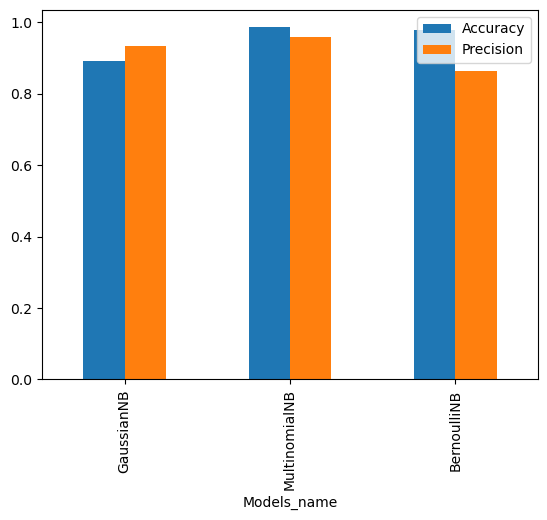

In [101]:
ndf.plot(x='Models_name',y=['Accuracy','Precision'],kind='bar')

In [102]:
import pickle
pickle.dump(cv,open('Victorize.pkl','wb'))
pickle.dump(mnb,open('Model.pkl','wb'))